目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可視化圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

(1) 做條形圖

(2) 利用 facet grid 繪圖並分析

題目 : 取得另一個 dataset: titanic,

1. 將每個class中男性和女性的平均存活率用長形圖可視化

2. 瞭解性別在各艙等存活率的分布

3. 繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。

4. 瞭解性別在各艙等的存活率的分布 (PS: 跟第一次做 Face.Grid 有何不同??)

In [18]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='survived'>

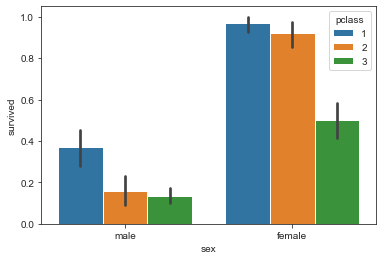

In [25]:
# 將每個class中男性和女性的平均存活率用長形圖可視化
sns.barplot(x = 'sex',y = 'survived', hue = 'pclass',data = df)
# x,y,hue: Inputs for plotting long-form data

在上面的示例中,我們可以看到每個班級中男性和女性的平均存活率。從情節中,我們可以理解,女性存活人數比男性多。在男性和女性中,更多的存活率來自頭等艙。




繪製數據子集的小倍數。 FacetGrid 示例,

FacetGrid 類有助於可視化一個變數的分佈,以及使用多個面板在數據集子集中分別顯示多個變數之間的關係。

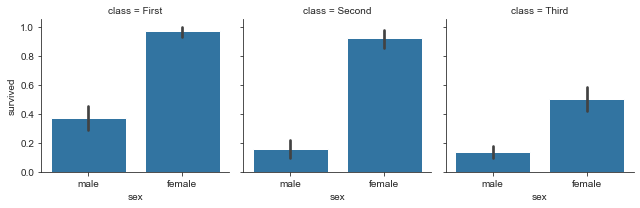

In [32]:
# 瞭解在各艙等不同性別的存活率
g = sns.FacetGrid(df, col = 'class')
g.map(sns.barplot, 'sex', 'survived', order = ['male', 'female'])

In [128]:
# 先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
# 其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

# df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived
# survived.plot(kind='bar')

pclass  sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: survived, dtype: int64

In [34]:
# 使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
# 繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts 

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<AxesSubplot:xlabel='pclass,sex'>

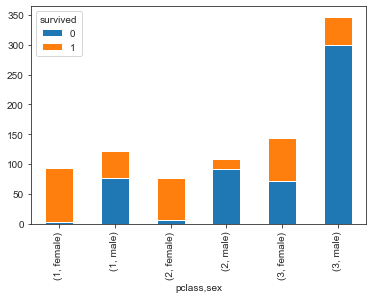

In [35]:
survived_counts.plot.bar(stacked=True) 
#stacked=True才是堆疊長條圖，False是一般的長條圖

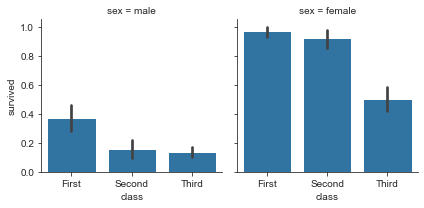

In [36]:
# 瞭解不同性別在各艙等的存活率

h = sns.FacetGrid(df, col = 'sex')
h.map(sns.barplot, 'class', 'survived', order = ['First', 'Second', 'Third'])

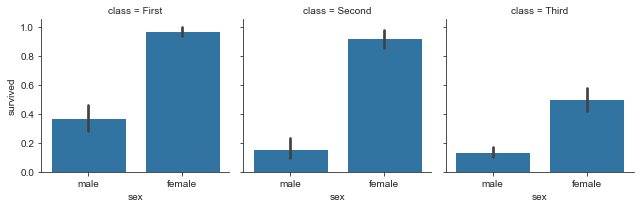

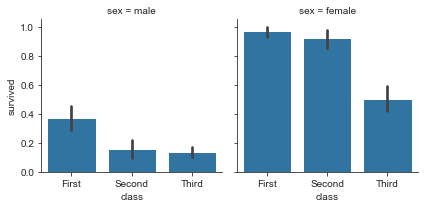

In [37]:
# PS: 跟第一次做 Face.Grid 有何不同??
g = sns.FacetGrid(df, col = 'class')
g.map(sns.barplot, 'sex', 'survived', order = ['male', 'female'])

h = sns.FacetGrid(df, col = 'sex')
h.map(sns.barplot, 'class', 'survived', order = ['First', 'Second', 'Third'])

#切分對象不同，所呈現的子圖個數就不同。
#前者先切分成三個子圖代表各艙等，然後去呈現男女存活率；後者切分成兩個子圖代表男女性別，而後去呈現各艙等存活率


可以嘗試其他的參數對照組合

 0   survived        
 1   pclass         
 2   sex            
 3   age          
 5   parch           
 6   fare        
 7   embarked   
 8   class   
 9   who           
 10  adult_male   
 11  deck      
 12  embark_town   
 13  alive         
 14  alone        

### Lecture

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = sns.load_dataset('iris')    # 取得鳶尾花資料集
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

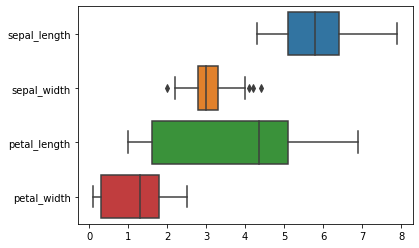

In [2]:
sns.boxplot(data = df, orient = "h")   # orient 控制方向: h horizontal/ v vertical

<AxesSubplot:xlabel='species', ylabel='petal_length'>

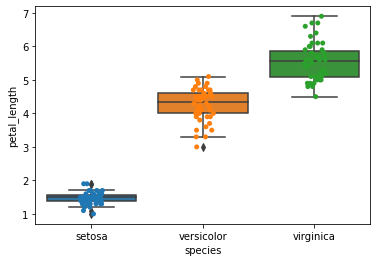

In [9]:
sns.boxplot(x = "species", y = "petal_length", data = df) 
sns.stripplot(x = "species", y = "petal_length", data = df)

C:\Users\shu mei\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

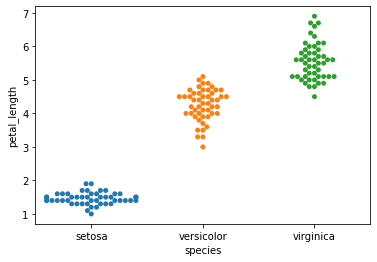

In [10]:
# swarm plot 的點會避免重疊
sns.swarmplot(x = "species", y = "petal_length", data = df)

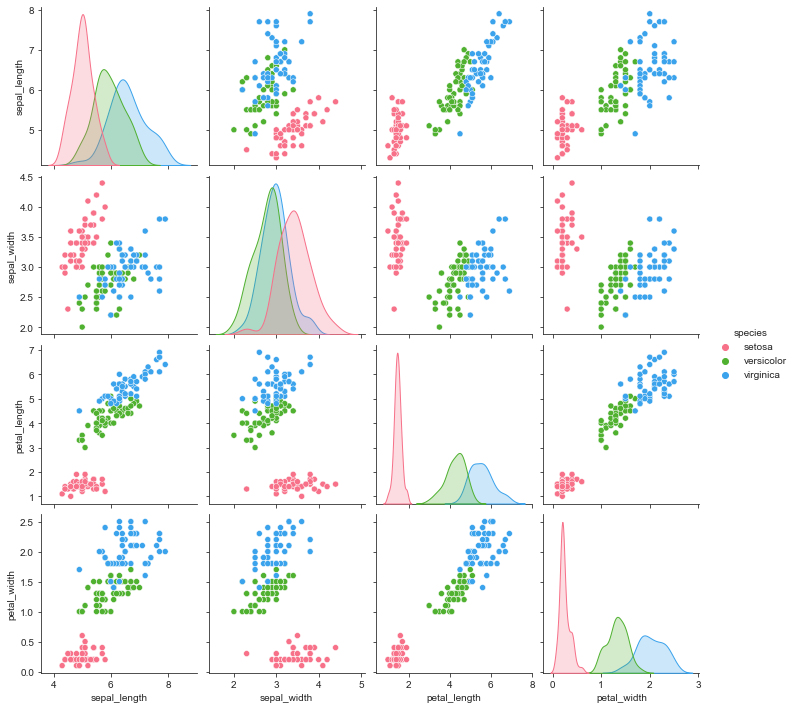

In [11]:
# 對角線的圖是內核密度圖 KDE Kernel Density Estimation
# KDE符合: 數據點處為波峰、正規化(曲線下面積為1) 、偶函數
sns.set_style("ticks")
sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
# kind: 控制非對角線的圖形，可選 "scatter"(散點圖)與"reg"(回歸直線)
# diag_kind : 控制對角線上的圖形，可選"hist"(直方圖)與"kde"(曲線圖)